In [1]:
using TaylorSeries
using PyPlot

INFO: Loading help data...


In [2]:
function step(x::Taylor1)
    eps=1e-20
    orden=length(x.coeffs)
    hs=Number[]
    for i in 1:orden #esto lo hacemos para evitar problemas con los coeficientes de Taylor que 
        #son cero
        if x.coeffs[i]!=0
            push!(hs,x.coeffs[i])
        end 
    end 
    orden=length(hs)
    p1=1/orden
    p2=1/(orden-1)
    den1=hs[orden]
    den2=hs[orden-1]
    h1=(abs(eps/den1))^p1
    h2=(abs(eps/den2))^p2
    h=min(h1,h2)
    #println(hs)

    return h
end 
    

step (generic function with 1 method)

In [3]:
g(x)=x^2

g (generic function with 1 method)

In [4]:
function xjet1(x::Number,orden::Int64,g::Function) #AQUI ESTÁ MI ERROR!!!! ENCONTRARLO!!
    xjet=zeros(orden)
    xjet[1]=x
    f=zeros(orden)
    for k in 1:orden-1
        a=Taylor1(xjet)
        b=g(a)
        f[k]=b.coeffs[k]
        xjet[k+1]=f[k]/(k) #OJO CON LA REALACION DE RECURRENCIA
    end 
    xaprox=Taylor1(xjet,orden)
    return xaprox
end 
    
    

xjet1 (generic function with 1 method)

In [5]:
function integrate{T<:Number}(t0::T,x0::T,orden::Int64,g::Function,iter::Int64)
    t=zeros(iter)
    xsolutions=zeros(iter)
    t[1]=t0 #tiempo inicial
    xsolutions[1]=x0 #condicion inicial
    contador =0
    for i in 1:iter-1
        xaprox=xjet1(xsolutions[i],orden,g)
        h=step(xaprox)
        #println(h)
        contador=contador+h
        t[i+1]=t[i]+h
        xsolutions[i+1]=evaluate(xaprox,h)#t[i+1])
    end 
    println("h total es ",contador)
    return t,xsolutions
end ;
    

In [6]:
t,solu=integrate(0,1,30,g,100)

h total es 0.9999999998513234


([0.0,0.204336,0.366919,0.49628,0.599208,0.681104,0.746266,0.798113,0.839366,0.872189  …  1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0],[1.0,1.25681,1.57958,1.98523,2.49506,3.13582,3.94114,4.95327,6.22533,7.82407  …  8.59656e8,1.08043e9,1.35789e9,1.70662e9,2.14489e9,2.69573e9,3.38802e9,4.25811e9,5.35164e9,6.72601e9])

In [7]:
exacta(t)=-1/(t-1)

exacta (generic function with 1 method)

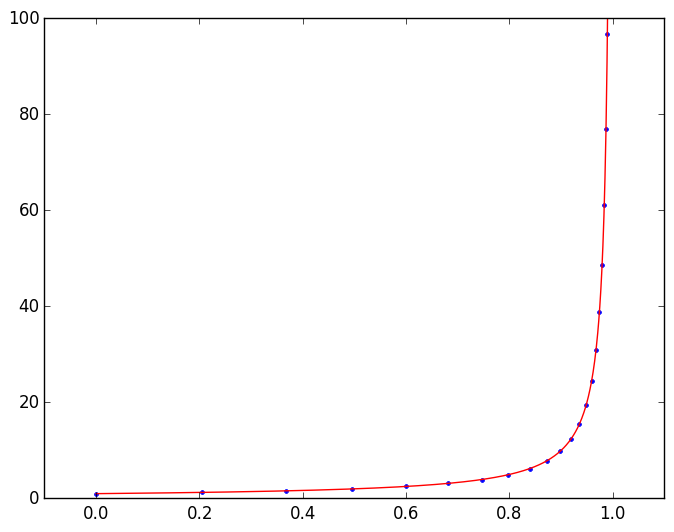

In [8]:
tprueba=linspace(0,0.999,1000)
xprueba2=zeros(1000)
for i in 1:1000
    xprueba2[i]=exacta(tprueba[i])
end 
plot(t,solu,"b.")
plot(tprueba,xprueba2,"r")
axis([-0.1,1.1,0,100]);

Ahora resolvamos la ecuación diferencial 
$$ \dot{x}=cos(x)$$

In [9]:
h(t)=cos(t)

h (generic function with 1 method)

In [10]:
a=xjet1(1,10,h)

 1.0 + 0.5403023058681398 t - 0.22732435670642046 t² + 0.03747418256102548 t³ + 0.014237314806030651 t⁴ - 0.012576547145317793 t⁵ + 0.003971267734786511 t⁶ + 0.00016538452973157068 t⁷ - 0.000836117607269213 t⁸ + 0.0004261258890918631 t⁹ + 𝒪(t¹¹)

In [11]:
t,solu=integrate(0,0,30,h,100)

h total es 642.9880257691788


([0.0,0.10725,0.454843,0.814688,1.20708,1.65112,2.15449,2.7327,3.41344,4.23799  …  573.749,581.442,589.135,596.829,604.522,612.215,619.908,627.602,635.295,642.988],[0.0,0.107045,0.439925,0.737133,0.989589,1.19173,1.3399,1.44089,1.50496,1.54193  …  1.5708,1.5708,1.5708,1.5708,1.5708,1.5708,1.5708,1.5708,1.5708,1.5708])

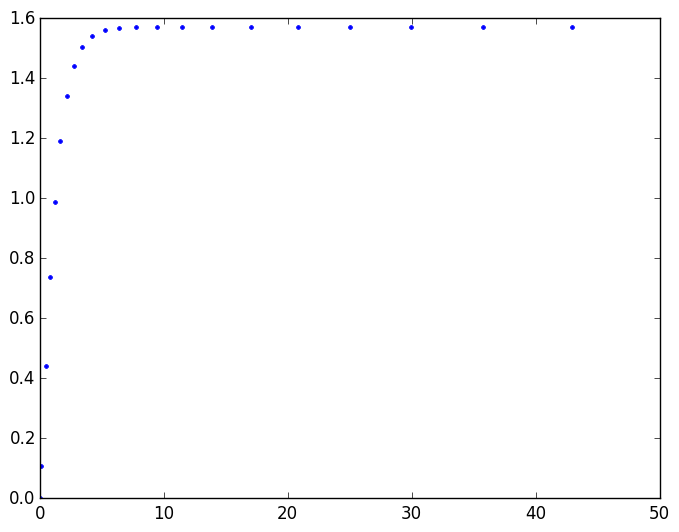

In [12]:
plot(t,solu,".")
axis([0,50,0,1.6]);

Ahora resolver: $$\ddot{x}=-sin(x)$$

In [50]:
function pendulo{T<:Number}(x::T,y::T)
    f1=y
    f2=-sin(x)
    return f1,f2
end 
    

pendulo (generic function with 1 method)

In [51]:
function xjetpendulo{T<:Number}(x::T,y::T,orden::Int64,g::Function) #AQUI ESTÁ MI ERROR!!!! ENCONTRARLO!!
    xjet=zeros(orden)
    yjet=zeros(orden)
    xjet[1]=x #cond. iniciales
    yjet[1]=y
    fx=zeros(orden)
    fy=zeros(orden)
    for k in 1:orden-1
        ax=Taylor1(xjet)
        ay=Taylor1(yjet)
        bx,by=g(ax,ay)
        fx[k]=bx.coeffs[k]
        fy[k]=by.coeffs[k]
        xjet[k+1]=fx[k]/(k)
        yjet[k+1]=fy[k]/(k)#OJO CON LA REALACION DE RECURRENCIA
    end 
    xaprox=Taylor1(xjet,orden)
    yaprox=Taylor1(yjet,orden)
    return xaprox,yaprox
end 
    
    

xjetpendulo (generic function with 2 methods)

In [52]:
function integratependulo{T<:Number}(t0::T,x0::T,y0::T,orden::Int64,g::Function,iter::Int64)
    t=zeros(iter)
    xsolutions=zeros(iter)
    ysolutions=zeros(iter)
    t[1]=t0 #tiempo inicial
    xsolutions[1]=x0
    ysolutions[1]=y0#condicion inicial
    contador =0
    for i in 1:iter-1
        xaprox,yaprox=xjetpendulo(xsolutions[i],ysolutions[i],orden,g)
        h=step(xaprox)
        #println(h)
        contador=contador+h
        t[i+1]=t[i]+h
        xsolutions[i+1]=evaluate(xaprox,h)#t[i+1])
        ysolutions[i+1]=evaluate(yaprox,h)
    end 
    println("h total es ",contador)
    return t,xsolutions,ysolutions
end ;
    

In [81]:
t,x,y=integratependulo(0,1,0,10,pendulo,1000); #orden 10 de taylor

h total es 14.771385858721569


([0.0,4.64863e-5,0.0150461,0.0300452,0.0450429,0.0600382,0.0750303,0.0900184,0.105002,0.119979  …  14.6524,14.6656,14.6788,14.692,14.7052,14.7184,14.7317,14.7449,14.7581,14.7714],[1.0,1.0,0.999905,0.99962,0.999146,0.998484,0.997632,0.996592,0.995364,0.993947  …  0.393291,0.381687,0.370025,0.358303,0.34652,0.334675,0.322766,0.310791,0.298749,0.286637],[0.0,-3.91168e-5,-0.0126606,-0.0252801,-0.0378953,-0.050504,-0.0631038,-0.0756925,-0.088268,-0.100828  …  -0.875615,-0.880608,-0.885456,-0.890158,-0.894716,-0.899127,-0.903393,-0.907513,-0.911486,-0.915312])

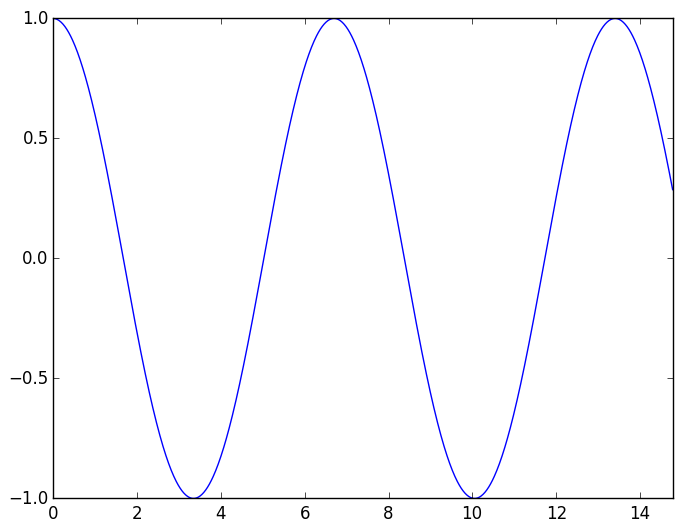

In [80]:
plot(t,x,"b")
#plot(t,y,"g")
axis([0,14.78,-1,1]);

En el espacio fase las soluciones del péndulo se ven como:

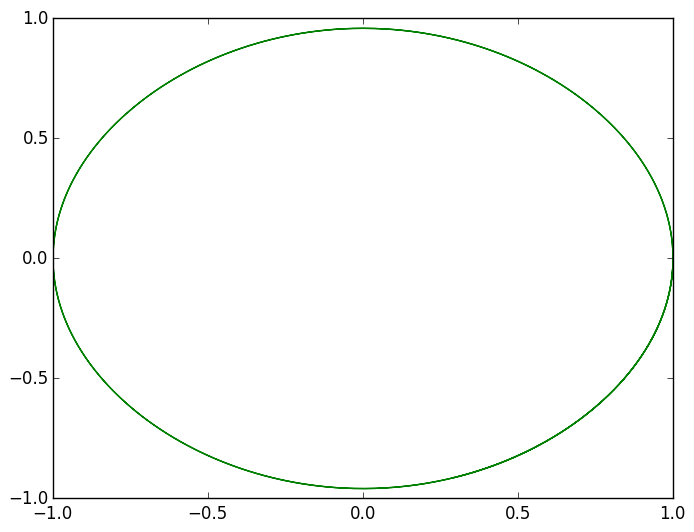

In [82]:
plot(x,y,"g");

Atoll´s model:


$$\dot{x}=5.0(1+\sigma+cosx-cosy)$$

$$\dot{y}=0.04(1+cosy+10cosx)$$

Usemos las condiciones iniciales $x(0)=1,y(0)=1$



In [56]:
function atoll{T<:Number}(x::T,y::T)
    σ=0.5
    f1=5.0*(1+σ+cos(x)-cos(y))
    f2=0.04*(1+cos(y)+10*cos(x))
    return f1,f2
end 

atoll (generic function with 1 method)

In [57]:
function xjetatoll{T<:Number}(x::T,y::T,orden::Int64,g::Function) #AQUI ESTÁ MI ERROR!!!! ENCONTRARLO!!
    xjet=zeros(orden)
    yjet=zeros(orden)
    xjet[1]=x #cond. iniciales
    yjet[1]=y
    fx=zeros(orden)
    fy=zeros(orden)
    for k in 1:orden-1
        ax=Taylor1(xjet)
        ay=Taylor1(yjet)
        bx,by=g(ax,ay)
        fx[k]=bx.coeffs[k]
        fy[k]=by.coeffs[k]
        xjet[k+1]=fx[k]/(k)
        yjet[k+1]=fy[k]/(k)#OJO CON LA REALACION DE RECURRENCIA
    end 
    xaprox=Taylor1(xjet,orden)
    yaprox=Taylor1(yjet,orden)
    return xaprox,yaprox
end 
    
    

xjetatoll (generic function with 1 method)

In [58]:
function integrateatoll{T<:Number}(t0::T,x0::T,y0::T,orden::Int64,g::Function,iter::Int64)
    t=zeros(iter)
    xsolutions=zeros(iter)
    ysolutions=zeros(iter)
    t[1]=t0 #tiempo inicial
    xsolutions[1]=x0
    ysolutions[1]=y0#condicion inicial
    contador =0
    for i in 1:iter-1
        xaprox,yaprox=xjetpendulo(xsolutions[i],ysolutions[i],orden,g)
        h=step(yaprox)
        #println(h)
        contador=contador+h
        t[i+1]=t[i]+h
        xsolutions[i+1]=evaluate(xaprox,h)#t[i+1])
        ysolutions[i+1]=evaluate(yaprox,h)
    end 
    println("h total es ",contador)
    return t,xsolutions,ysolutions
end ;
    

In [74]:
tatoll,xatoll,yatoll=integrateatoll(0.,-π,-π,10,atoll,60000)

h total es 204.9281432437599


([0.0,0.00489489,0.00872767,0.0123183,0.0157691,0.0191203,0.0223934,0.0256015,0.0287536,0.0318558  …  204.913,204.914,204.916,204.918,204.919,204.921,204.923,204.925,204.926,204.928],[-3.14159,-3.10488,-3.0761,-3.04912,-3.02314,-2.99786,-2.97312,-2.94879,-2.92483,-2.90116  …  1344.17,1344.19,1344.22,1344.24,1344.27,1344.3,1344.32,1344.35,1344.38,1344.41],[-3.14159,-3.14355,-3.14508,-3.14651,-3.14789,-3.14921,-3.15051,-3.15177,-3.153,-3.15421  …  -27.4453,-27.4446,-27.444,-27.4433,-27.4426,-27.442,-27.4413,-27.4406,-27.4399,-27.4392])

Se calculan los cosenos de los arreglos anteriores 

In [75]:
cosyatoll=cos(yatoll)
cosxatoll=cos(xatoll);

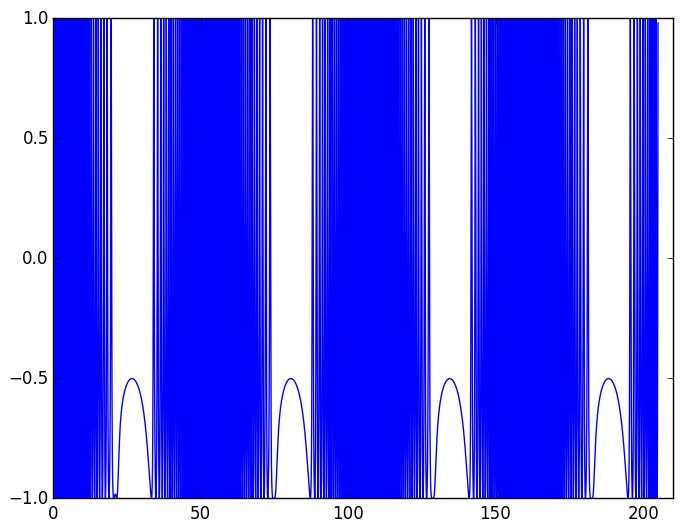

In [77]:
plot(tatoll,cosxatoll,"b")
axis([0,210,-1,1])
#plot(tatoll,yatoll,"g");

Las soluciones en el espacio fase se ven como:

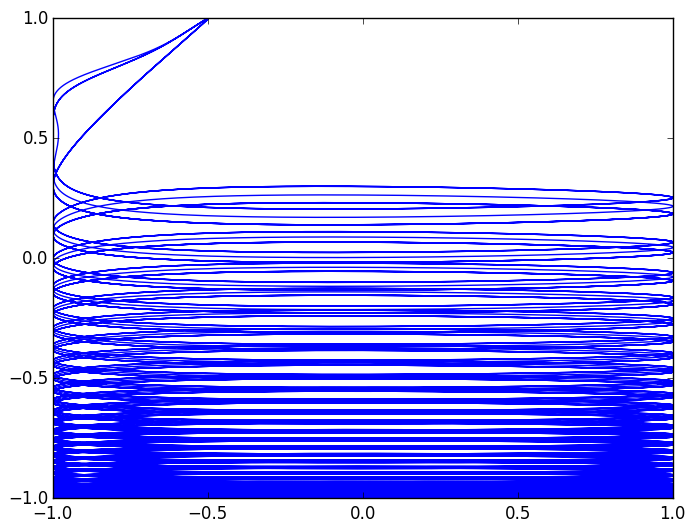

In [79]:
plot(cosxatoll,cosyatoll);

Otro ejercicio resolviendo ecuaciones diferenciales no lineales...

$$\ddot{\theta}=-sin(\theta)+cos(\omega t) $$

reproduje algunos resultados de [http://ww2.odu.edu/~agodunov/teaching/notes/Cp05_chaos.pdf]

In [42]:
function beats{T<:Number}(t,ω,x::T,y::T)
    A=0.1
    f1=y
    f2=-sin(x)+A*cos(ω*t)
    return f1,f2
end 
    

beats (generic function with 1 method)

In [43]:
function xjetbeats{T<:Number}(t0,ω,x::T,y::T,orden::Int64,g::Function) #AQUI ESTÁ MI ERROR!!!! ENCONTRARLO!!
    xjet=zeros(orden)
    yjet=zeros(orden)
    xjet[1]=x #cond. iniciales
    yjet[1]=y
    fx=zeros(orden)
    fy=zeros(orden)
    for k in 1:orden-1
        ax=Taylor1(xjet)
        ay=Taylor1(yjet)
        bx,by=g(t0,ω,ax,ay)
        fx[k]=bx.coeffs[k]
        fy[k]=by.coeffs[k]
        xjet[k+1]=fx[k]/(k)
        yjet[k+1]=fy[k]/(k)#OJO CON LA REALACION DE RECURRENCIA
    end 
    xaprox=Taylor1(xjet,orden)
    yaprox=Taylor1(yjet,orden)
    return xaprox,yaprox
end 
    
    

xjetbeats (generic function with 1 method)

In [44]:
function integratebeats{T<:Number}(t0::T,ω,x0::T,y0::T,orden::Int64,g::Function,iter::Int64)
    t=zeros(iter)
    xsolutions=zeros(iter)
    ysolutions=zeros(iter)
    t[1]=t0 #tiempo inicial
    xsolutions[1]=x0
    ysolutions[1]=y0#condicion inicial
    contador =0
    for i in 1:iter-1
        xaprox,yaprox=xjetbeats(t[i],ω,xsolutions[i],ysolutions[i],orden,g)
        h=step(xaprox)
        #println(h)
        contador=contador+h
        t[i+1]=t[i]+h
        xsolutions[i+1]=evaluate(xaprox,h)#t[i+1])
        ysolutions[i+1]=evaluate(yaprox,h)
    end 
    println("h total es ",contador)
    return t,xsolutions,ysolutions
end ;
    

In [45]:
t0=0.0
ω=1.1
x0=0.2
y0=0.0
orden=10
iter=7000
t,θ,y=integratebeats(t0,ω,x0,y0,orden,beats,iter)

h total es 119.9037513696001


([0.0,9.48461e-5,0.0276073,0.0551136,0.0826012,0.110058,0.137473,0.164834,0.192132,0.219356  …  119.743,119.762,119.785,119.804,119.822,119.839,119.855,119.872,119.888,119.904],[0.2,0.2,0.199962,0.19985,0.199663,0.199403,0.199068,0.19866,0.198179,0.197626  …  -0.667193,-0.677816,-0.690541,-0.700795,-0.710085,-0.718793,-0.727061,-0.734961,-0.742539,-0.749824],[0.0,-9.3584e-6,-0.00272366,-0.00543659,-0.00814744,-0.0108555,-0.0135602,-0.0162608,-0.0189569,-0.0216479  …  -0.573477,-0.559975,-0.543137,-0.528997,-0.515712,-0.502815,-0.490145,-0.477622,-0.465197,-0.452839])

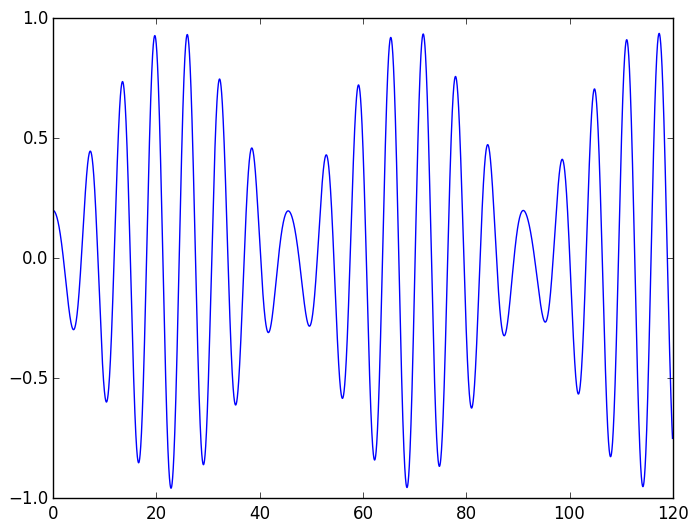

In [46]:
plot(t,θ);

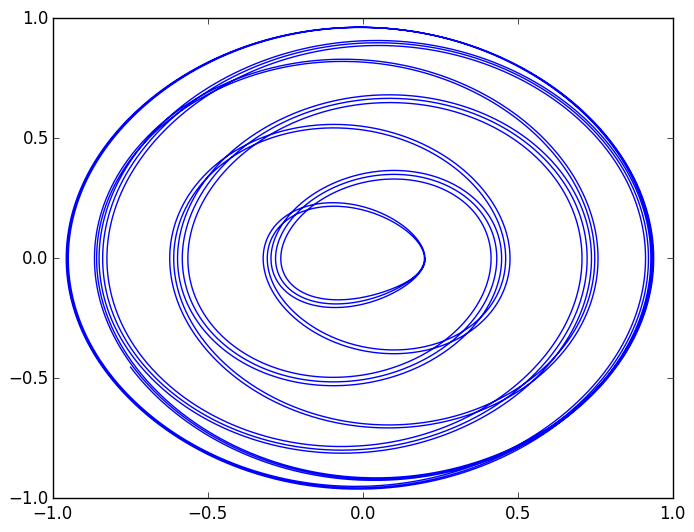

In [47]:
plot(θ,y);